## Le WebScraping en étapes:

Pour les bibliothèques nécessaires pour les exemples ci-dessous, vous pouvez accéder à votre ligne de commande et les installer avec Conda install (si vous utilisez la distribution Anaconda) ou pip install pour les autres distributions Python.

1.) **Requests** : Ce module est utilisé pour visiter une URL et obtenir le contenu d'une page web.La bibliothèque "Requests" en Python est un outil populaire utilisé pour simplifier les opérations liées aux requêtes HTTP. Elle offre une interface simple et élégante pour envoyer des requêtes HTTP, gérer les cookies, les en-têtes, les sessions, et gérer d'autres aspects liés aux communications web. "Requests" permet aux développeurs d'interagir facilement avec des API, de récupérer des données à partir de sites web, et d'effectuer diverses opérations liées aux protocoles HTTP. Grâce à sa simplicité d'utilisation et à ses fonctionnalités puissantes, "Requests" est largement utilisée dans le domaine du web scraping, de l'automatisation web, et de l'accès aux services web.

Vous pouvez le télécharger avec pip install requests ou conda install requests (pour la distribution Anaconda de Python) dans votre invite de commande.

2.) **BeautifulSoup** :une bibliothèque Python qui facilite l'extraction d'informations à partir de documents HTML et XML. Elle offre des méthodes souples pour parcourir et rechercher des éléments dans le code source HTML/XML, facilitant ainsi l'analyse et la manipulation de données web..

Vous pouvez le télécharger avec pip install beautifulsoup4 ou conda install beautifulsoup4 (pour la distribution Anaconda de Python) dans votre invite de commande.

3.) **parser HTML** :Beautiful Soup prend en charge différents parseurs (analysateurs) pour analyser le code source HTML ou XML. Deux des parseurs populaires utilisés avec Beautiful Soup sont "lxml" et "html.parser"...

* lxml : "lxml" est un parseur externe qui est construit sur les bibliothèques C libxml2 et libxslt. Il est rapide, efficace et capable de gérer des documents HTML et XML complexes. "lxml" est souvent recommandé pour sa rapidité, en particulier lors du traitement de grandes quantités de données.


* html.parser : "html.parser" est un parseur natif inclus dans la bibliothèque standard de Python. Il est plus lent que "lxml" mais peut être suffisant pour des tâches moins gourmandes en ressources. Aucune installation supplémentaire n'est nécessaire, car il fait partie de la bibliothèque standard.


* html5lib : Il s'agit d'un parseur externe qui implémente l'algorithme de l'HTML Living Standard. Il est précis et capable de gérer des documents HTML mal formés, mais il est généralement plus lent que les autres parseurs.

## Application:

On considère le site: www.imdb.com

**1- Analyse du Site Web :**

On considère le site imdb et cette URL : https://www.imdb.com/title/tt0108778/episodes/ .inspectez la structure HTML pour comprendre comment les informations de la série ,ses épisodes et les différentes saisons sont présentées.
Identifiez les balises HTML, les classes et les IDs pertinents qui contiennent les données que vous souhaitez extraire.

**2-Extraction des Informations de Base :**

* 2.1- les épisodes de la saison 1:

Utilisez Beautiful Soup pour envoyer une requête HTTP à la page https://www.imdb.com/title/tt0108778/episodes/  récupérez le contenu HTML.
Récupérez la liste des episodes de la 1ere saison.
Récupérer pour chaque épisode , son numéro, son nom, la date de sortie, la note et la description

* 2.2-Récupérer toutes les saisons  

Etendre votre travail précédent pour extraire les les épisodes des 10 saisons de la série



# Imports

In [1]:
import requests
from bs4 import BeautifulSoup
from typing import Optional
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scraping using BS4

In [2]:
# L'url du site à scrapper
url = 'https://www.imdb.com/title/tt0108778/episodes/'

# ma requete HTTP avec un "GET" au serveur du site identifier dans l'url
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3,content-Type=application/json','Accept-Language': 'en-US,en;q=0.5'}
response = requests.get(url, headers=headers)

# J'affiche l'url ainsi que le retour du serveur
print(url, response.status_code)



https://www.imdb.com/title/tt0108778/episodes/ 200


In [3]:
# Je demande à beautifulSoup de conserver dans une variable "soup" la page web à scrapper (un script html)
soup = BeautifulSoup(response.content, 'html')
# soup

In [4]:
titres = soup.find_all('div', {'class': 'sc-ccd6e31b-4 eMYVLm'})
# titres.find_all('div', {'class': 'sc-ccd6e31b-5 cXcoHr'})
titres[0].find('div', {'class': 'ipc-title__text'})
# titres[0].find('span', {'class': 'ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating'}).text

<div class="ipc-title__text">S1.E1 ∙ The One Where Monica Gets a Roommate</div>

In [5]:
def extract_info(url: str) -> list[str]:
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3','Accept-Language': 'en-US,en;q=0.5'}
    response = requests.get(url, headers=headers)
    results = {}
    if response.status_code != 200:
        print(response.status_code)
        exit(1)
    soup = BeautifulSoup(response.content, 'html')
    episodes = soup.find_all('div', {'class': 'sc-ccd6e31b-4 eMYVLm'})
    for episode in episodes:
        try:
            infos = episode.find('div', {'class': 'ipc-title__text'}).text
            number,title=infos.split('∙')
            date= episode.find('span', {'class': 'sc-ccd6e31b-10 fVspdm'}).text
            note=episode.find('span', {'class': 'ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating'}).text
            results[number]={'title':title.strip(), 'date':date.strip(), 'rating':note.strip()}
        except Exception as e:
            pass
    return results

In [6]:
seasons = {}

for id_season in range(1, 11):
    url = f'https://www.imdb.com/title/tt0108778/episodes/?season={id_season}'
    seasons.update(extract_info(url))

In [7]:
df=pd.DataFrame.from_dict(seasons,orient='index')
df.head()

,title,date,rating
S1.E1,The One Where Monica Gets a Roommate,"Wed, Sep 21, 1994",8.1/10 (10K)
S1.E2,The One with the Sonogram at the End,"Wed, Sep 28, 1994",7.9/10 (8K)
S1.E3,The One with the Thumb,"Wed, Oct 5, 1994",8.0/10 (7.5K)
S1.E4,The One with George Stephanopoulos,"Wed, Oct 12, 1994",7.9/10 (7.3K)
S1.E5,The One with the East German Laundry Detergent,"Wed, Oct 19, 1994",8.3/10 (7.3K)


## data cleaning,transforming, visualization

In [8]:
df[['ratings','stars_count_(K)']]=df['rating'].str.extract(r'(?P<rating>\d+\.\d+)/\d+\xa0\((?P<stars>\d+(?:\.\d*)?)K\)',expand=True)
df['release_date']=pd.to_datetime(df['date'])
df.index=df.index.str.split('.',expand=True)
df.index.rename(['season','episode'],inplace=True)

In [9]:
cols=['title','release_date','ratings','stars_count_(K)']
data=df[cols]
data.to_csv('friends_seasons_data.csv',index_label='reference',sep=';')

In [10]:
numerics=['ratings','stars_count_(K)']
data[numerics]=data[numerics].astype('float')

C:\Users\laien\AppData\Local\Temp\ipykernel_5652\1773909833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerics]=data[numerics].astype('float')


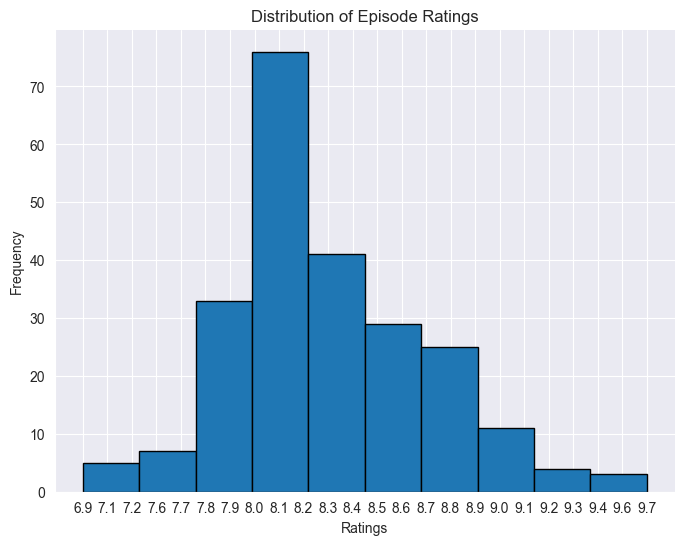

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(df['ratings'].sort_values(), bins=10, edgecolor='black')

plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Episode Ratings')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: title={'center': 'average rating distribution over seasons'}, xlabel='season', ylabel='rating'>

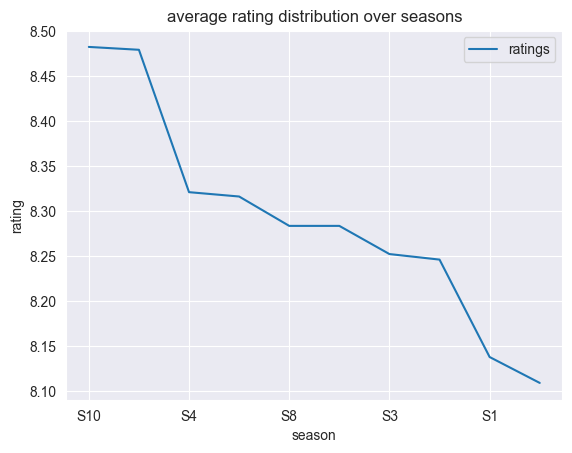

In [12]:
data.groupby(level=0).agg({'ratings':'mean'}).sort_values('ratings',ascending=False).plot(xlabel="season",ylabel="rating",title="average rating distribution over seasons")

<Axes: title={'center': 'number of votes per season'}, xlabel='season', ylabel='votes count'>

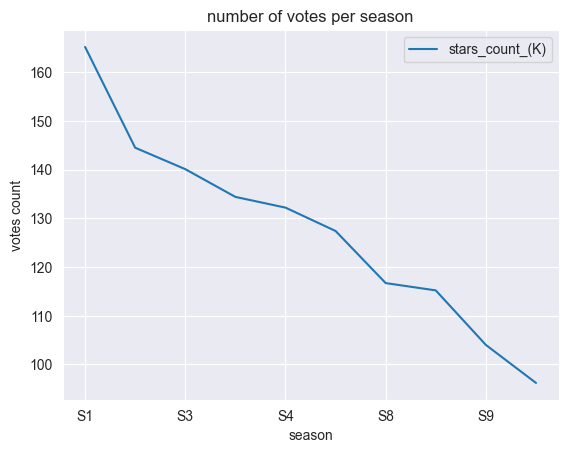

In [13]:
data.groupby(level=0).agg({'stars_count_(K)':'sum'}).sort_values('stars_count_(K)',ascending=False).plot(xlabel="season",ylabel="votes count",title="number of votes per season")

<Axes: title={'center': 'number of episode per year'}, xlabel='release_date'>

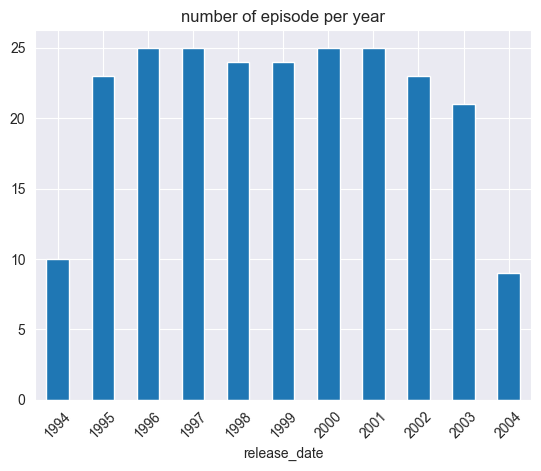

In [14]:
data.groupby(data['release_date'].dt.year).count()['title'].plot(kind='bar',rot=45,title='number of episode per year')
# sns.histplot(data['release_date'].dt.year,bins=(2005-1994))

# BDD and queries

In [15]:
conn=sqlite3.connect(":memory:")
data.to_sql('friends_seasons',conn)

234

In [16]:
#select all data
pd.read_sql_query("SELECT * FROM friends_seasons",conn)

,season,episode,title,release_date,ratings,stars_count_(K)
0,S1,E1,The One Where Monica Gets a Roommate,1994-09-21 00:00:00,8.1,10.0
1,S1,E2,The One with the Sonogram at the End,1994-09-28 00:00:00,7.9,8.0
2,S1,E3,The One with the Thumb,1994-10-05 00:00:00,8.0,7.5
3,S1,E4,The One with George Stephanopoulos,1994-10-12 00:00:00,7.9,7.3
4,S1,E5,The One with the East German Laundry Detergent,1994-10-19 00:00:00,8.3,7.3
...,...,...,...,...,...,...
229,S10,E13,The One Where Joey Speaks French,2004-02-18 00:00:00,8.3,5.0
230,S10,E14,The One with Princess Consuela,2004-02-25 00:00:00,8.4,4.8
231,S10,E15,The One Where Estelle Dies,2004-04-21 00:00:00,8.4,4.5
232,S10,E16,The One with Rachel's Going Away Party,2004-04-28 00:00:00,8.8,5.2


In [17]:
# ranking season by rating
query = """
select season, avg(ratings) avg_note from friends_seasons
group by season
order by avg_note desc
"""
df_rating_rank_season = pd.read_sql(query, conn)
df_rating_rank_season

,season,avg_note
0,S10,8.482353
1,S5,8.479167
2,S4,8.320833
3,S6,8.316000
4,S2,8.283333
5,S8,8.283333
6,S3,8.252000
7,S7,8.245833
8,S1,8.137500
9,S9,8.108696


In [18]:
#top 5 episode best rated
query = """
select season, episode, ratings from friends_seasons
order by ratings desc
limit 5;
"""
df_rating_rank_season = pd.read_sql(query, conn)
df_rating_rank_season

,season,episode,ratings
0,S5,E14,9.7
1,S10,E17,9.6
2,S4,E12,9.4
3,S2,E14,9.3
4,S6,E25,9.2


# Scraping using Selenium (solution number two)

In [19]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
import time

In [20]:
def extract_info_selenium(url: str) -> dict:
    # Set up Selenium options
    firefox_options = Options()
    firefox_options.add_argument("--headless")  # Run headless Firefox
    firefox_options.add_argument("--no-sandbox")
    firefox_options.add_argument("--disable-dev-shm-usage")
    firefox_options.set_preference("general.useragent.override", 
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")
    
    # Set up the WebDriver
    driver = webdriver.Firefox(options=firefox_options)
    
    # Fetch the URL
    driver.get(url)
    time.sleep(1)  # Allow time for the page to fully load
    
    results = {}

    # Extract episode information
    episodes = driver.find_elements(By.CSS_SELECTOR, 'div.sc-ccd6e31b-4.eMYVLm')
    for episode in episodes:
        try:
            infos = episode.find_element(By.CSS_SELECTOR, 'div.ipc-title__text').text
            number, title = infos.split('∙')
            date = episode.find_element(By.CSS_SELECTOR, 'span.sc-ccd6e31b-10.fVspdm').text
            note = episode.find_element(By.CSS_SELECTOR, 'span.ipc-rating-star.ipc-rating-star--base.ipc-rating-star--imdb.ratingGroup--imdb-rating').text
            results[number.strip()] = {'title': title.strip(), 'date': date.strip(), 'rating': note.strip()}
        except Exception as e:
            pass
    
    driver.quit()
    return results

In [21]:
seeaon_from_selenium = {}

for id_season in range(1, 11):
    url = f'https://www.imdb.com/title/tt0108778/episodes/?season={id_season}'
    seeaon_from_selenium.update(extract_info_selenium(url))

In [22]:
pd.DataFrame.from_dict(seeaon_from_selenium,orient='index')

,title,date,rating
S1.E1,The One Where Monica Gets a Roommate,"Thu, Sep 22, 1994",8.1\n/10\n (10K)
S1.E2,The One with the Sonogram at the End,"Thu, Sep 29, 1994",7.9\n/10\n (8K)
S1.E3,The One with the Thumb,"Thu, Oct 6, 1994",8.0\n/10\n (7.5K)
S1.E4,The One with George Stephanopoulos,"Thu, Oct 13, 1994",7.9\n/10\n (7.3K)
S1.E5,The One with the East German Laundry Detergent,"Thu, Oct 20, 1994",8.3\n/10\n (7.3K)
...,...,...,...
S10.E13,The One Where Joey Speaks French,"Thu, Feb 19, 2004",8.3\n/10\n (5K)
S10.E14,The One with Princess Consuela,"Thu, Feb 26, 2004",8.4\n/10\n (4.8K)
S10.E15,The One Where Estelle Dies,"Thu, Apr 22, 2004",8.4\n/10\n (4.5K)
S10.E16,The One with Rachel's Going Away Party,"Thu, Apr 29, 2004",8.8\n/10\n (5.2K)


## Ressources utiles



https://www.crummy.com/software/BeautifulSoup/bs4/doc/

https://www.crummy.com/software/BeautifulSoup/bs4/doc/#css-selectors


